In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LA_Volume_Cleaned.csv to LA_Volume_Cleaned (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('LA_Volume_Cleaned.csv')

In [ ]:
df

,Time,0,1,2,3,4,5,6,7,8,...,219,220,221,222,223,224,225,226,227,228
0,2023-04-01 00:00:00,6.60,3.85,12.650000,25.300000,6.050000,6.050000,13.200000,6.60,0.000000,...,18.700000,11.550000,12.100000,1.100000,2.161360,0.000000,4.950,0.0,3.300000,3.386842
1,2023-04-01 01:00:00,6.05,3.85,13.200000,16.500000,8.800000,9.350000,13.200000,6.60,0.000000,...,15.950000,7.150000,8.250000,1.100000,2.160538,0.000000,6.600,0.0,6.600000,3.502632
2,2023-04-01 02:00:00,7.15,3.85,13.200000,18.150000,12.650000,19.250000,13.200000,6.60,0.000000,...,22.000000,6.050000,1.100000,1.100000,2.159716,6.050000,6.600,0.0,6.600000,3.618421
3,2023-04-01 03:00:00,6.60,3.85,7.150000,7.700000,2.750000,20.350000,12.100000,6.60,0.000000,...,17.050000,7.150000,0.000000,1.100000,2.158894,2.750000,4.400,0.0,6.600000,3.734211
4,2023-04-01 04:00:00,6.05,3.85,18.150000,17.050000,0.000000,19.250000,14.300000,8.25,0.000000,...,18.700000,4.400000,0.000000,1.100000,2.158072,2.855479,4.422,0.0,6.600000,3.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,2023-09-30 19:00:00,8.80,3.85,12.640717,20.114808,5.223618,8.711077,2.895139,1.10,4.015337,...,3.378582,9.833025,12.650052,4.309614,3.687401,1.173881,0.550,1.0,3.266967,0.550000
4388,2023-09-30 20:00:00,8.80,3.85,12.640580,20.161846,5.229146,8.726178,2.881771,1.10,4.012270,...,3.366148,9.846420,12.650041,4.310688,3.688492,1.165672,0.550,1.0,3.273574,0.550000
4389,2023-09-30 21:00:00,8.80,3.85,12.640443,20.208885,5.234673,8.741280,2.868403,1.10,4.009202,...,3.353714,9.859815,12.650031,4.311762,3.689583,1.157463,0.550,1.0,3.280180,0.550000
4390,2023-09-30 22:00:00,8.80,3.85,12.640305,20.255923,5.240201,8.756382,2.855035,1.10,4.006135,...,3.341280,9.873210,12.650021,4.312836,3.690675,1.149254,0.550,1.0,3.286787,0.550000


In [ ]:
!pip install numpy==1.26.4 scipy==1.11.4 statsmodels==0.14.0 matplotlib==3.8.0 --force-reinstall --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 10.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.

In [ ]:
# Testing the ARIMA on one site
site = '0'  # Example site ID
site_data = df[site]

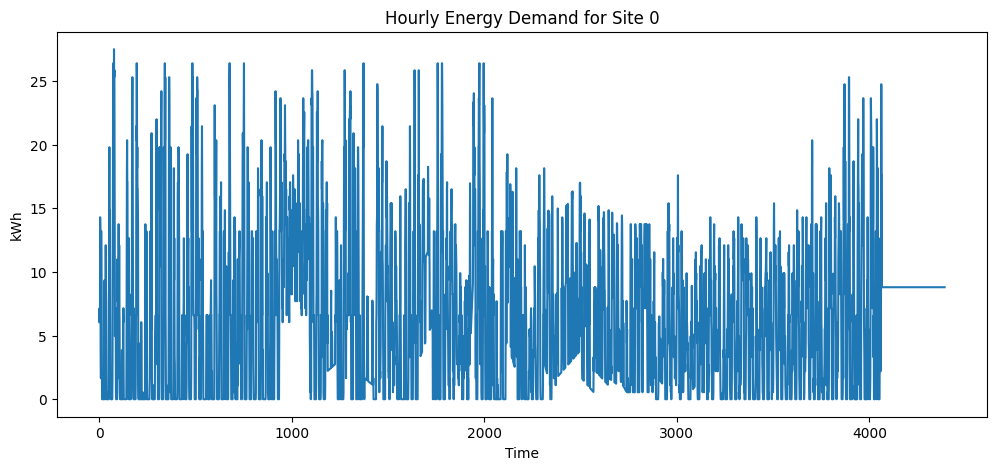

ADF Statistic: -7.663240360326984
p-value: 1.6670412311291815e-11


In [ ]:
#Visualize and check that the series is stationary - assumption for ARIMA
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plot
plt.figure(figsize=(12,5))
plt.plot(site_data)
plt.title(f"Hourly Energy Demand for Site {site}")
plt.xlabel("Time")
plt.ylabel("kWh")
plt.show()

# ADF test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(site_data.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


The series is stationary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [ ]:
# Pick one site to model
site = '0'   # change this to another site ID as needed
site_data = df[site].dropna()

# Train-test split (e.g., 80% train, 20% test)
train_size = int(len(site_data) * 0.8)
train, test = site_data[:train_size], site_data[train_size:]

print(f"Training size: {len(train)}, Test size: {len(test)}")


Training size: 3513, Test size: 879


In [ ]:
# Simple ARIMA model (fast baseline)
model = ARIMA(train, order=(1,1,1))  # small order = faster
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 3513
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9305.282
Date:                Wed, 22 Oct 2025   AIC                          18616.565
Time:                        16:22:26   BIC                          18635.057
Sample:                             0   HQIC                         18623.163
                               - 3513                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4808      0.118     -4.059      0.000      -0.713      -0.249
ma.L1          0.5611      0.112      4.999      0.000       0.341       0.781
sigma2        11.7196      0.167     70.200      0.0

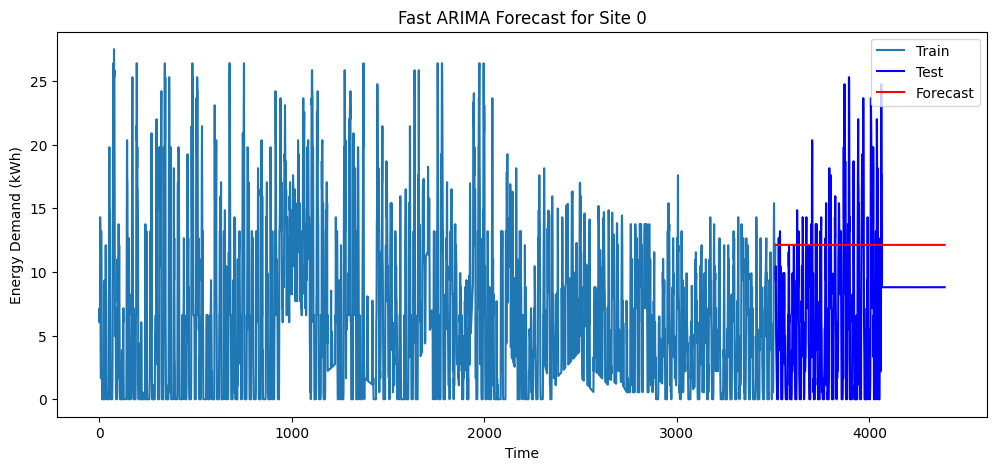

In [ ]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title(f"Fast ARIMA Forecast for Site {site}")
plt.xlabel("Time")
plt.ylabel("Energy Demand (kWh)")
plt.legend()
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 7.05
MAE: 5.89


In [ ]:
#Adding a seasonal component
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,0,1,24))
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=len(test))



In [ ]:
# Combine into a single DataFrame for comparison
results_df = pd.DataFrame({
    'Actual': test,
    'Forecast': forecast
})

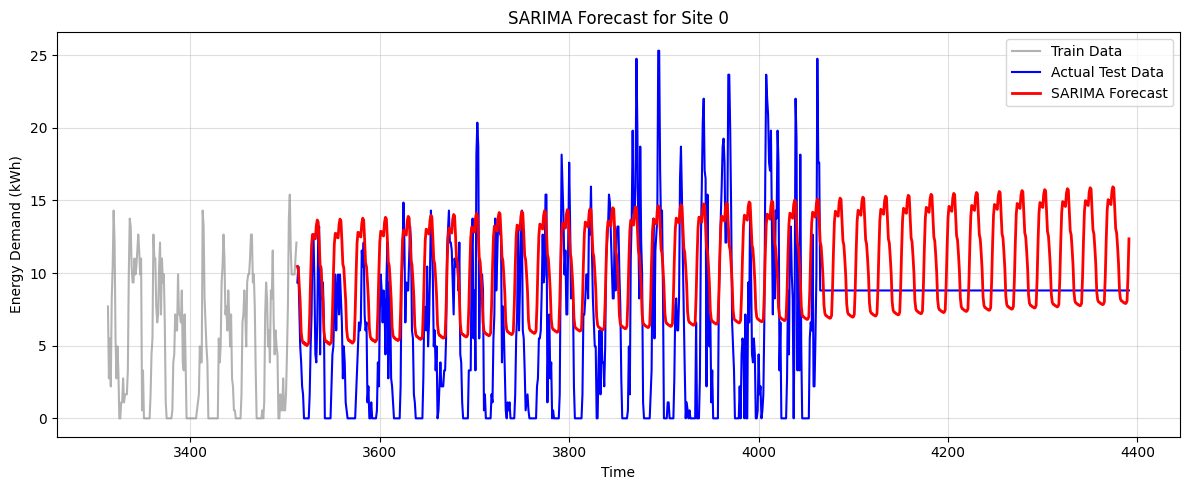

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index[-200:], train[-200:], label='Train Data', color='gray', alpha=0.6)
plt.plot(test.index, test, label='Actual Test Data', color='blue')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='red', linewidth=2)
plt.title(f"SARIMA Forecast for Site {site}")
plt.xlabel("Time")
plt.ylabel("Energy Demand (kWh)")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


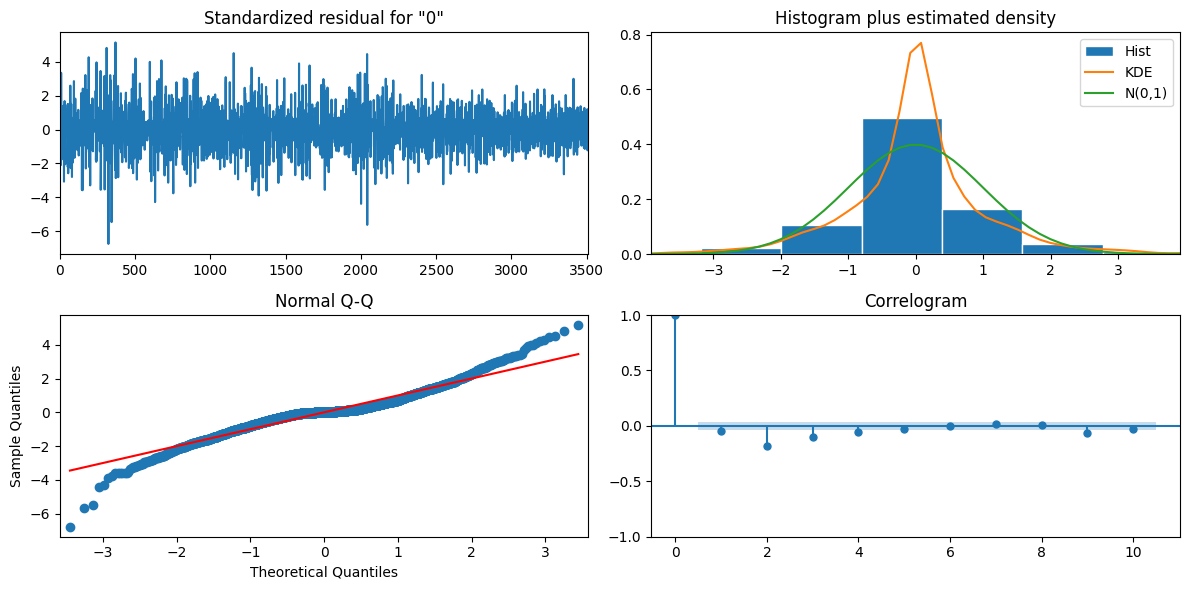

In [ ]:
model_fit.plot_diagnostics(figsize=(12,6))
plt.tight_layout()
plt.show()


In [ ]:
# Convert all columns in df to numeric (anything non-numeric becomes NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Now safely compute total hourly demand
df['Total_kWh'] = df.sum(axis=1, numeric_only=True)

# Check result
print("Total_kWh column created successfully!")
print(df['Total_kWh'].head())


✅ Total_kWh column created successfully!
0    1905.667919
1    2145.195613
2    2304.982782
3    2210.018448
4    2219.303412
Name: Total_kWh, dtype: float64


In [ ]:
# Split data: 80% train, 20% test
total_data = df['Total_kWh'].dropna()

train_size = int(len(total_data) * 0.8)
train, test = total_data[:train_size], total_data[train_size:]

print(f"Training data points: {len(train)}")
print(f"Testing data points: {len(test)}")


Training data points: 3513
Testing data points: 879


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Total_kWh   No. Observations:                 3513
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21161.736
Date:                Wed, 22 Oct 2025   AIC                          42329.472
Time:                        16:45:13   BIC                          42347.964
Sample:                             0   HQIC                         42336.070
                               - 3513                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7338      0.013     58.175      0.000       0.709       0.759
ma.L1         -0.0672      0.018     -3.659      0.000      -0.103      -0.031
sigma2      1.002e+04    186.748     53.648      0.0

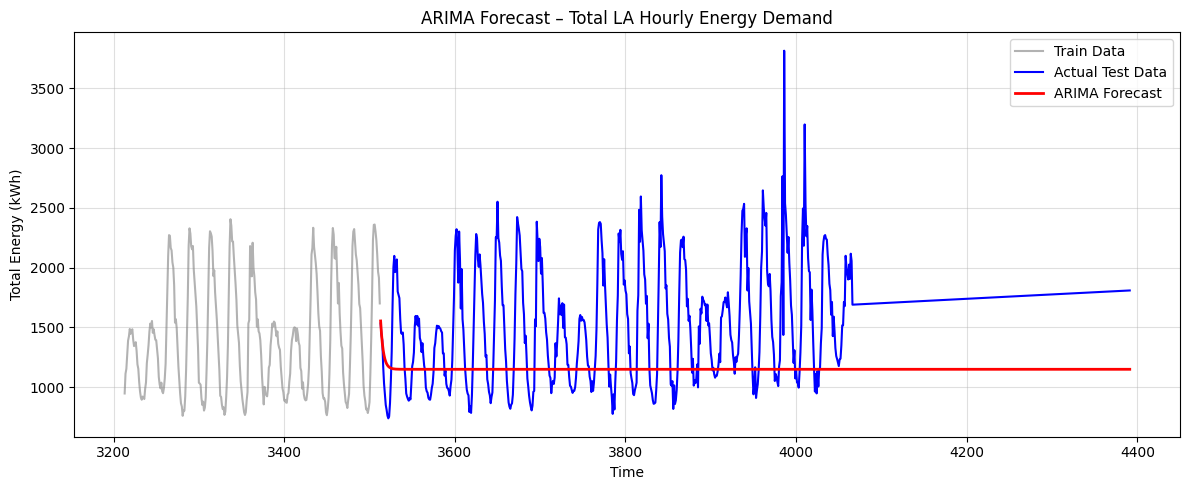

In [ ]:
import matplotlib.pyplot as plt

# Forecast for test set length
forecast = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12,5))
plt.plot(train.index[-300:], train[-300:], label='Train Data', color='gray', alpha=0.6)
plt.plot(test.index, test, label='Actual Test Data', color='blue')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linewidth=2)
plt.title("ARIMA Forecast – Total LA Hourly Energy Demand")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")


✅ RMSE: 605.90
✅ MAE : 512.90


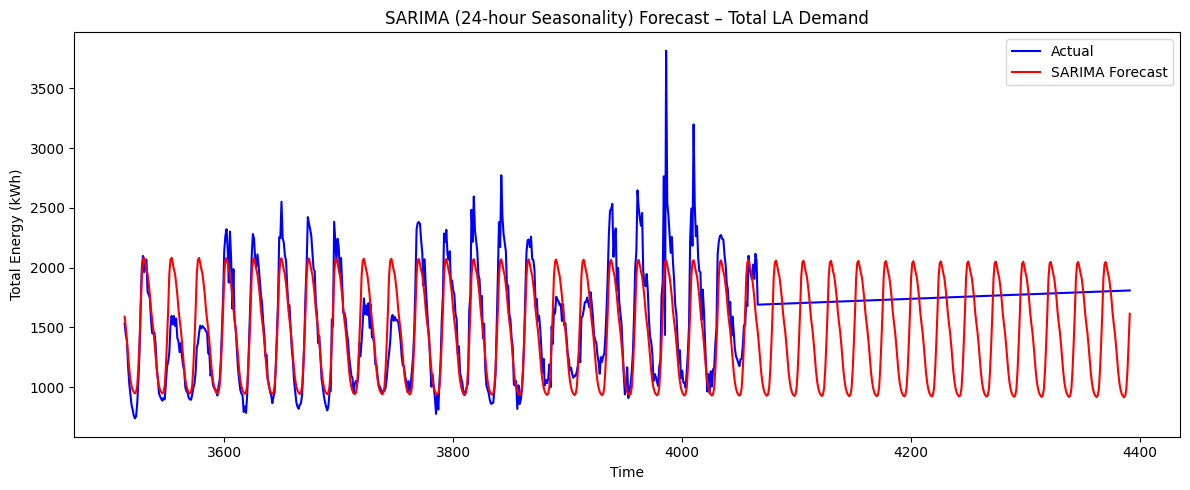

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit seasonal model
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,0,1,24))
sarima_fit = sarima_model.fit(disp=False)

# Forecast for test period
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Plot SARIMA results
plt.figure(figsize=(12,5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title("SARIMA (24-hour Seasonality) Forecast – Total LA Demand")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# tuned parameters
model_tuned = SARIMAX(
    train,
    order=(2,1,3),          # more short-term memory
    seasonal_order=(2,0,2,24),  # stronger 24-hour seasonal pattern
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_tuned_fit = model_tuned.fit(disp=False)

# Forecast
sarima_tuned_forecast = sarima_tuned_fit.forecast(steps=len(test))


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, sarima_tuned_forecast, label='Tuned SARIMA Forecast', color='red')
plt.title("Tuned SARIMA Forecast – Capturing Daily Movements")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, sarima_tuned_forecast))
mae  = mean_absolute_error(test, sarima_tuned_forecast)
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
